# Fourieranalyse und Akustik
## 1. Bestimmung der Tonhöhe eines akustischen Signals

In [ ]:
Das darsgestellte Signal aus dem Oszilloskop, mit mehreren Perioden, sieht so aus:

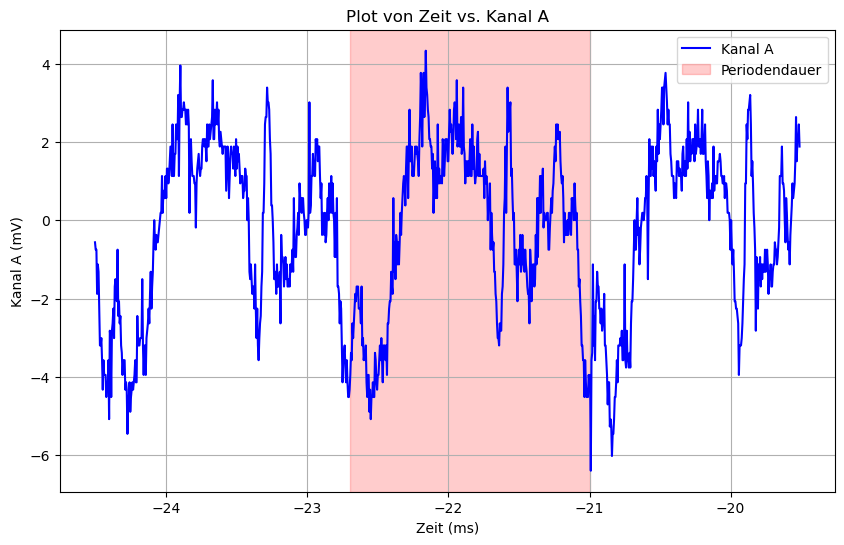

In [10]:
import numpy as np
import matplotlib.pyplot as plt

filename = 'Versuch3-Oeffnung5.csv'

def comma_into_dot(x):
    return float(x.replace(',', '.'))

data = np.genfromtxt(
    filename,
    delimiter=';',
    skip_header=3,
    converters={0: comma_into_dot, 1: comma_into_dot}
)

zeit = data[:, 0]
kanal_a = data[:, 1]
zoomedZeit = zeit[100:1100]
zoomedKanalA = kanal_a[100:1100]

start_zeit = -22.7
end_zeit = -21

plt.figure(figsize=(10,6))
plt.plot(zoomedZeit, zoomedKanalA, label="Kanal A", color="blue")
plt.axvspan(start_zeit, end_zeit, color='red', alpha=0.2, label="Periodendauer")
plt.title("Plot von Zeit vs. Kanal A")
plt.xlabel("Zeit (ms)")
plt.ylabel("Kanal A (mV)")
plt.grid()
plt.legend()
plt.show()

Es wurde eine 10-facher Zoom verwendet. Eine Periode konnte anhand des Plots zwischen -22,1 ms und 21,0 ms abgelesen und markiert werden. Folgende Signaldauer, Signallänge, Grundfrequenz, Grundperiode, sowie Abtastfrequenz konnten ermittelt werden

In [11]:
grundperiode = end_zeit - start_zeit
signaldauer = zeit[-1] - zeit[0] # in (ms)
signallaenge = len(zeit)
grundfrequenz = 1 / grundperiode
abtastfrequenz = 1 / (zeit[500] - zeit[499])

print("Signaldauer: ", signaldauer, "(ms)")
print("Signallänge M", signallaenge, " Samples")
print("Grundfrequenz: ", grundfrequenz, "(kHz)")
print("Grundperiode: ", grundperiode, "(ms)")
print("Abtastfrequenz: ", abtastfrequenz, "(kHz)")

Signaldauer:  50.01499873 (ms)
Signallänge M 10004  Samples
Grundfrequenz:  0.5882352941176473 (kHz)
Grundperiode:  1.6999999999999993 (ms)
Abtastfrequenz:  200.0000000000398 (kHz)


Die Fouriertransformation ergibt folgendes Amplitudenspektrum:

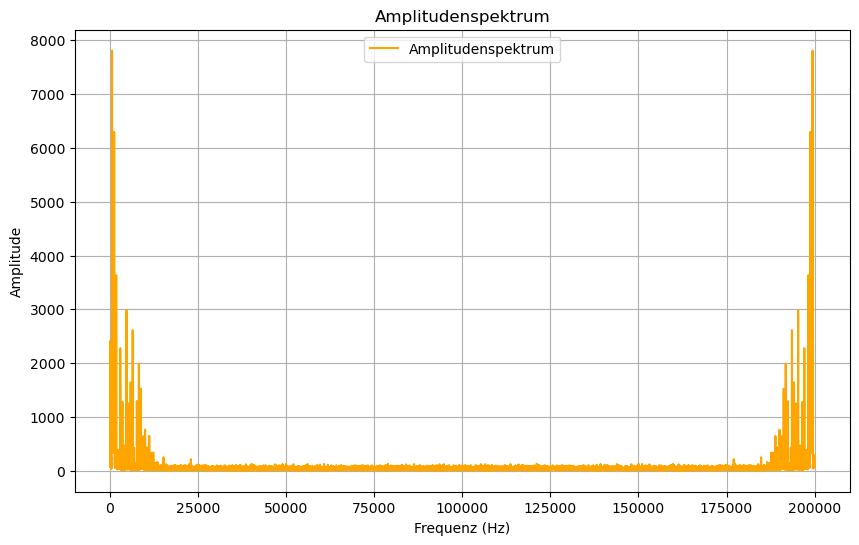

In [12]:
fft_values = np.fft.fft(kanal_a)
fft_magnitude = np.abs(fft_values)
freq_axis = np.arange(0, signallaenge) / (signallaenge * ((zeit[2] - zeit[1]) / 1000))

plt.figure(figsize=(10,6))
plt.plot(freq_axis, fft_magnitude, label="Amplitudenspektrum", color="orange")
plt.title("Amplitudenspektrum")
plt.xlabel("Frequenz (Hz)")
plt.ylabel("Amplitude")
plt.grid()
plt.legend()
plt.show()

Ein 50-facher Zoom an dem linken Rand ergibt eine bessere Darstellung:

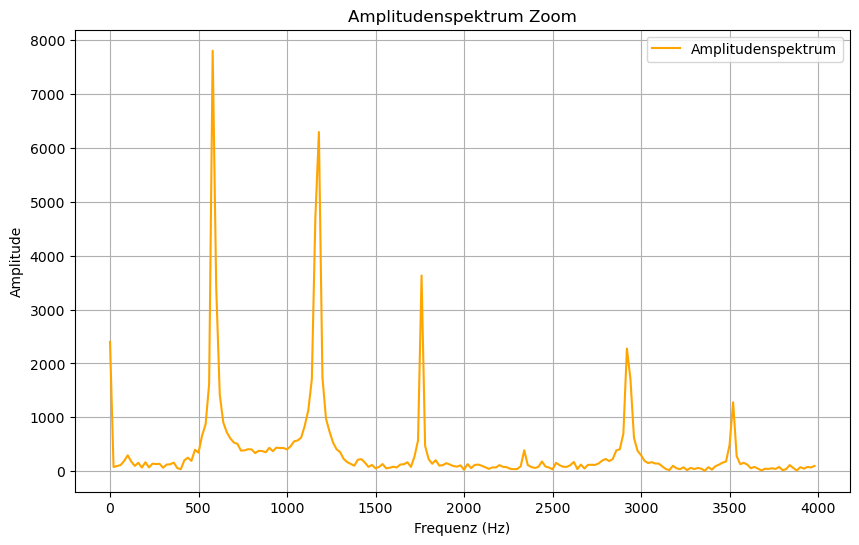

In [13]:
freq_axis_zoom = freq_axis[0:200]
fft_magnitude_zoom = fft_magnitude[0:200]

plt.figure(figsize=(10,6))
plt.plot(freq_axis_zoom , fft_magnitude_zoom, label="Amplitudenspektrum", color="orange")
plt.title("Amplitudenspektrum Zoom")
plt.xlabel("Frequenz (Hz)")
plt.ylabel("Amplitude")
plt.grid()
plt.legend()
plt.show()

Hiermit lässt sich auf folgender Weise die Grundfrequenz und die zugehörige Amplitude ableiten:

In [14]:
find_max = np.argmax(fft_magnitude)
max_freq = freq_axis[find_max]

print("Grundfrequenz: ", max_freq, "Hz")
print("Amplitude: ", fft_magnitude[find_max])

Grundfrequenz:  579.7680927630103 Hz
Amplitude:  7806.3390469976


## 2. Frequenzgang von Lautsprechern
Die gemessen Daten für beide Lautsprecher - dem großen und dem kleinen - wurden in Numpy-Arrays übertragen. Folgende Phasengänge ergeben sich:

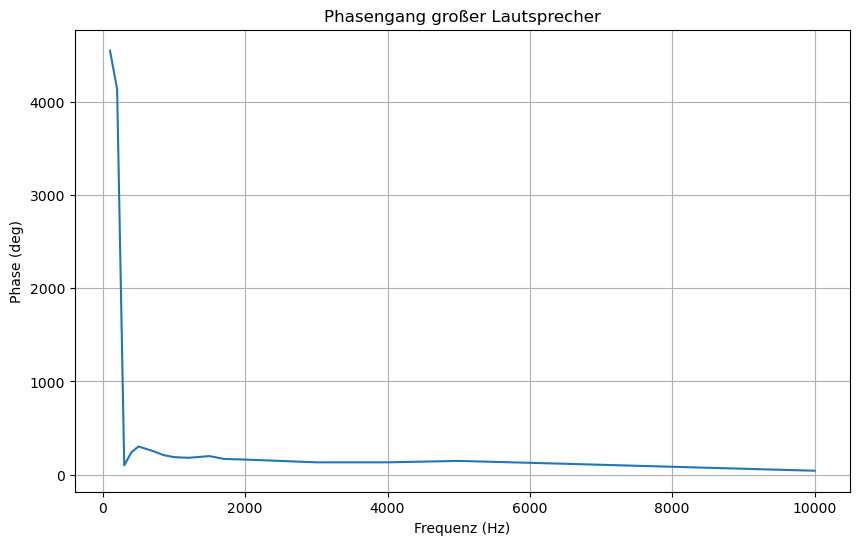

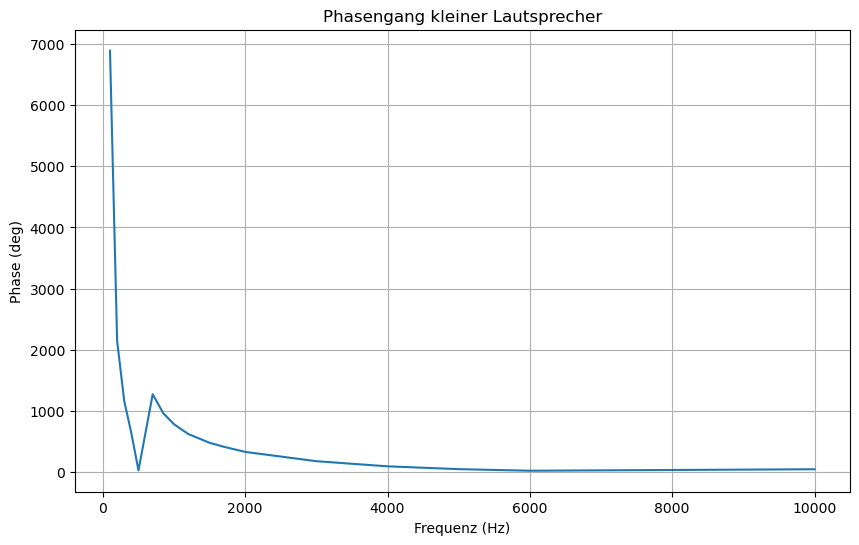

In [15]:
frequencies_gross = np.array([100, 200, 300, 400, 500, 700, 850, 1000, 1200, 1500, 1700, 2000, 3000, 4000, 5000, 6000, 10000]) # Hz
a_peak_gross = np.array([1.501, 1.484, 1.484, 1.506, 1.506, 1.506, 1.506, 1.506, 1.506, 1.506, 1.501, 1.501, 1.519, 1.519, 1.501, 1.519, 1.484]) # V
b_peak_gross = np.array([31.99, 109, 84.74, 59.67, 48.43, 34.58, 31.99, 33.72, 30.71, 28.98, 29.42, 28.55, 26.39, 42.39, 25.95, 25.96, 18.51]) * 1000 # V
phase_shift_gross = np.array([4550, 4138, 99.68, 239.6, 302.1, 254.3, 210.1, 188, 180.7, 199.1, 169, 161.7, 132.2, 132.4, 147.4, 127.1, 42.17]) # micro s

frequencies_klein = np.array([100, 200, 300, 400, 500, 700, 850, 1000, 1200, 1500, 1700, 2000, 3000, 4000, 5000, 6000, 10000])
a_peak_klein = np.array([1.5, 1.5, 1.5, 1.517, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.517, 1.5, 1.5, 1.5, 1.517])
b_peak_klein = np.array([12.12, 18.18, 28.57, 54.98, 82.69, 43.29, 38.1, 29.87, 25.11, 27.27, 25.98, 26.41, 32.04, 21.21, 22.08, 14.29, 16.88]) * 1000
phase_shift_klein = np.array([6888, 2147, 1166, 639.2, 31.85, 1276, 963.1, 785.4, 625.4, 482.7, 417.4, 333.7, 181.8, 98.01, 52.09, 26.32, 50.25])

plt.figure(figsize=(10, 6))
plt.plot(frequencies_gross, phase_shift_gross)
plt.title("Phasengang großer Lautsprecher")
plt.xlabel("Frequenz (Hz)")
plt.ylabel("Phase (deg)")
plt.grid()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(frequencies_klein, phase_shift_klein)
plt.title("Phasengang kleiner Lautsprecher")
plt.xlabel("Frequenz (Hz)")
plt.ylabel("Phase (deg)")
plt.grid()
plt.show()

Das Bode-Diagramm für beide Lautsprecher mit entsprechenden Angaben in Dezibel und und dem dazugehörigen Phasenwinkel sieht so aus:

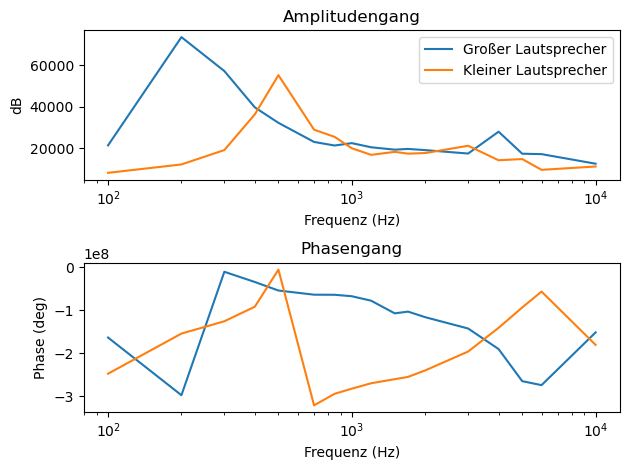

In [16]:
phase_response_gross = phase_shift_gross * -1  * frequencies_gross * 360
phase_response_klein = phase_shift_klein * -1 * frequencies_klein * 360

amplitude_response_gross = b_peak_gross / a_peak_gross
amplitude_response_klein = b_peak_klein / a_peak_klein

plt.subplot(2, 1, 1)
plt.title("Amplitudengang")
plt.semilogx(frequencies_gross, amplitude_response_gross, label="Großer Lautsprecher")
plt.semilogx(frequencies_klein, amplitude_response_klein, label="Kleiner Lautsprecher")
plt.xlabel("Frequenz (Hz)")
plt.ylabel("dB")
plt.legend()

# Zweiter Subplot
plt.subplot(2, 1, 2)
plt.title("Phasengang")
plt.semilogx(frequencies_gross, phase_response_gross, label="Großer Lautsprecher")
plt.semilogx(frequencies_klein, phase_response_klein, label="Kleiner Lautsprecher")
plt.xlabel("Frequenz (Hz)")
plt.ylabel("Phase (deg)")

plt.tight_layout()
plt.show()
